In [1]:
train_dir='../input/fercustomdataset-3classes/FER_Custom_Dataset'

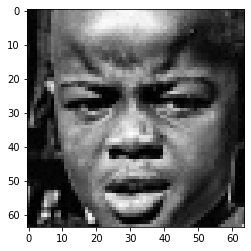

In [2]:
import matplotlib.pyplot as plt
img=plt.imread('../input/fercustomdataset-3classes/FER_Custom_Dataset/Disappointed/100.jpg')
#img.shape #(64,64,3)
plt.imshow(img)
plt.show()

In [17]:
import tensorflow as tf
training=tf.keras.preprocessing.image.ImageDataGenerator(rescale=1/255.0,
                                                         rotation_range=7,
                                                         horizontal_flip=True,
                                                         validation_split=0.2).flow_from_directory(train_dir,batch_size=16,
                                                                                                   target_size=(64,64),
                                                                                                   subset="training",
                                                                                                   )

validing=tf.keras.preprocessing.image.ImageDataGenerator(rescale=1/255.0,
                                                         rotation_range=7,
                                                         horizontal_flip=True,
                                                         validation_split=0.2).flow_from_directory(train_dir,batch_size=16,
                                                                                                   target_size=(64,64),
                                                                                                   subset='validation',
                                                                                                   shuffle=False
                                                                                                   )


Found 35056 images belonging to 3 classes.
Found 8763 images belonging to 3 classes.


In [8]:
from keras.models import Sequential
from keras.layers import Dense,Conv2D ,MaxPooling2D , BatchNormalization ,Dropout ,Flatten
from keras.optimizers import  Adamax
from keras.callbacks import EarlyStopping ,ReduceLROnPlateau

In [9]:
optimizers=Adamax(learning_rate=0.001,beta_1=0.9,beta_2=0.99,decay=0.001/32)
EarlyStop=EarlyStopping(patience=10,restore_best_weights=True,monitor='accuracy')
Reduce_LR=ReduceLROnPlateau(monitor='loss',verbose=2,factor=0.5,min_lr=0.00001)
callback=[EarlyStop , Reduce_LR]

In [10]:
num_classes = 3
num_detectors=32

network = Sequential()

network.add(Conv2D(num_detectors, (3,3), activation='relu', padding = 'same', input_shape = (64, 64, 3)))
network.add(BatchNormalization())
network.add(Conv2D(num_detectors, (3,3), activation='relu', padding = 'same'))
network.add(BatchNormalization())
network.add(MaxPooling2D(pool_size=(2,2)))
network.add(Dropout(0.2))

network.add(Conv2D(2*num_detectors, (3,3), activation='relu', padding = 'same'))
network.add(BatchNormalization())
network.add(Conv2D(2*num_detectors, (3,3), activation='relu', padding = 'same'))
network.add(BatchNormalization())
network.add(MaxPooling2D(pool_size=(2,2)))
network.add(Dropout(0.2))

network.add(Conv2D(2*2*num_detectors, (3,3), activation='relu', padding = 'same'))
network.add(BatchNormalization())
network.add(Conv2D(2*2*num_detectors, (3,3), activation='relu', padding = 'same'))
network.add(BatchNormalization())
network.add(MaxPooling2D(pool_size=(2,2)))
network.add(Dropout(0.2))

network.add(Conv2D(2*2*2*num_detectors, (3,3), activation='relu', padding = 'same'))
network.add(BatchNormalization())
network.add(Conv2D(2*2*2*num_detectors, (3,3), activation='relu', padding = 'same'))
network.add(BatchNormalization())
network.add(MaxPooling2D(pool_size=(2,2)))
network.add(Dropout(0.2))

network.add(Flatten())

network.add(Dense(2 * num_detectors, activation='relu'))
network.add(BatchNormalization())
network.add(Dropout(0.2))

network.add(Dense(2 * num_detectors, activation='relu'))
network.add(BatchNormalization())
network.add(Dropout(0.2))

network.add(Dense(num_classes, activation='softmax'))

In [11]:
network.compile(optimizer=optimizers,loss='categorical_crossentropy', metrics=["accuracy"])

In [21]:
history=network.fit(training,validation_data=validing,epochs=20, callbacks=callback, verbose=2)


Epoch 1/20
2191/2191 - 87s - loss: 0.3468 - accuracy: 0.8669 - val_loss: 0.3424 - val_accuracy: 0.8601
Epoch 2/20
2191/2191 - 88s - loss: 0.3382 - accuracy: 0.8702 - val_loss: 0.3533 - val_accuracy: 0.8497
Epoch 3/20
2191/2191 - 89s - loss: 0.3379 - accuracy: 0.8702 - val_loss: 0.3668 - val_accuracy: 0.8405
Epoch 4/20
2191/2191 - 87s - loss: 0.3368 - accuracy: 0.8699 - val_loss: 0.3658 - val_accuracy: 0.8466
Epoch 5/20
2191/2191 - 90s - loss: 0.3393 - accuracy: 0.8725 - val_loss: 0.3661 - val_accuracy: 0.8423
Epoch 6/20
2191/2191 - 114s - loss: 0.3324 - accuracy: 0.8737 - val_loss: 0.3701 - val_accuracy: 0.8458
Epoch 7/20
2191/2191 - 119s - loss: 0.3281 - accuracy: 0.8759 - val_loss: 0.3624 - val_accuracy: 0.8477
Epoch 8/20
2191/2191 - 121s - loss: 0.3203 - accuracy: 0.8781 - val_loss: 0.3792 - val_accuracy: 0.8421
Epoch 9/20
2191/2191 - 122s - loss: 0.3245 - accuracy: 0.8763 - val_loss: 0.3698 - val_accuracy: 0.8435
Epoch 10/20
2191/2191 - 109s - loss: 0.3161 - accuracy: 0.8775 - val_

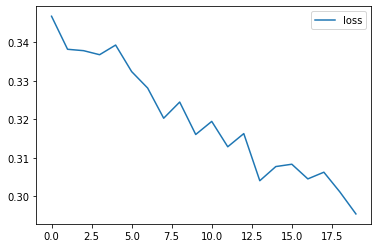

In [22]:
metrics = history.history
plt.plot(history.epoch, metrics['loss'])
plt.legend(['loss'])
plt.show()

In [23]:
model_json=network.to_json()
with open('network.json','w') as json_file :
    json_file.write(model_json)


In [25]:
network.save('Education.h5')